In [1]:
import os
from glob import glob
import earthpy.plot as ep

In [2]:
import gdal
import statistics
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import rasterio
import sys

In [5]:
working_clusters = os.getcwd() + "\\working_clusters\\Krishna"
working_ndvi = os.getcwd() + "\\working_ndvi\\Krishna"
if not os.path.exists(working_clusters):
    os.mkdir(working_clusters)
if not os.path.exists(working_ndvi):
    os.mkdir(working_ndvi)

In [6]:
path = os.getcwd()
path = path + "\\ndvi_images"
orig_scenes = glob(path+"\\Krishna*.tif")
orig_scenes

['C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\ndvi_images\\Krishna20170210.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\ndvi_images\\Krishna20180302.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\ndvi_images\\Krishna20190210.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\ndvi_images\\Krishna20200215.tif']

In [7]:
data = os.getcwd() + "\\rsgislib_clusters"
scenes = glob(data+"\\Krishna*_sub_clusters_ndvi.tif")
scenes

['C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\rsgislib_clusters\\Krishna20170210_sub_clusters_ndvi.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\rsgislib_clusters\\Krishna20180302_sub_clusters_ndvi.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\rsgislib_clusters\\Krishna20190210_sub_clusters_ndvi.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\rsgislib_clusters\\Krishna20200215_sub_clusters_ndvi.tif']

In [8]:
def saveImage(src, savePath, arr):
    with rasterio.Env():
        profile = src.profile
        profile.update(
            dtype=rasterio.float64,
            count=1)
        with rasterio.open(savePath, 'w', **profile) as dst:
            dst.write(arr.astype(rasterio.float64), 1)

In [9]:
def filterCluster(clusters, num, ndvi_orig, empty):
    cls = np.where(clusters == num, ndvi_orig, empty)
    minimum = np.nanmin(cls)
    maximum = np.nanmax(cls)
    return [num, minimum, maximum]

In [10]:
#def getClusterBounds(clusters):
#    sparse_low = 0
#    for date in clusters:
#        sparse_low = sparse_low + date[2][1]
#    sparse_low = sparse_low / len(clusters)
#    sparse_up = 0
#    for date in clusters:
#        sparse_up = sparse_up + date[3][1]
#    sparse_up = sparse_up / len(clusters)
#    return [sparse_low, sparse_up]


def getClusterBounds(clusters):
    sparse_low = []
    for date in clusters:
        sparse_low.append(date[2][1])
    sparse_low = statistics.median(sparse_low)
    sparse_up = []
    for date in clusters:
        sparse_up.append(date[3][1])
    sparse_up = statistics.median(sparse_up)
    return [sparse_low, sparse_up]

In [11]:
date_bands = {}
for i in range(len(orig_scenes)):
    date = orig_scenes[i].split('\\')[-1].split('.')[0]
    ndvi_image = gdal.Open(orig_scenes[i])
    ndvi_orig = np.array(ndvi_image.GetRasterBand(1).ReadAsArray())
    clustered_image = gdal.Open(scenes[i])
    clusters = np.array(clustered_image.GetRasterBand(1).ReadAsArray())
    band_values = []
    for num in range(1,7):
        band_values.append(filterCluster(clusters, num, ndvi_orig, np.nan))
    date_bands[date] = band_values
    print(date)
    for band in band_values:
        print(band)
#print(date_bands)

Krishna20170210
[1, 0.17170923379174852, 0.3298360655737705]
[2, 0.4712230215827338, 0.5968602825745682]
[3, -0.45745322872661437, -0.0016858668165214948]
[4, 0.3298364702252391, 0.47122219674386606]
[5, 0.5968608013217679, 0.7816863100634632]
[6, -0.0016857089342573516, 0.17170891251022077]
Krishna20180302
[1, 0.5329202168861348, 0.7931895168479229]
[2, 0.2190179267342167, 0.3645197740112994]
[3, -0.14874141876430205, 0.05562526139690506]
[4, 0.05562556255625563, 0.21901757548445244]
[5, 0.3645200486026732, 0.5329199881901387]
[6, -0.5078610603290676, -0.14874436574372182]
Krishna20190210
[1, 0.4288407163053723, 0.5706137348847821]
[2, 0.06283783783783783, 0.26445152480655437]
[3, 0.695170580416482, 0.8892128279883382]
[4, -0.9952941176470588, 0.06283662477558348]
[5, 0.2644526445264453, 0.4288398309065289]
[6, 0.5706138879570614, 0.6951690821256039]
Krishna20200215
[1, 0.7326859187324304, 0.9996265172735761]
[2, -0.3005390835579515, 0.0776566757493188]
[3, 0.3139477575160177, 0.52834

In [12]:
print(date_bands.keys())

dict_keys(['Krishna20170210', 'Krishna20180302', 'Krishna20190210', 'Krishna20200215'])


In [13]:
def sortClusters(clusters):
    for i in range(len(clusters)):
        clusters[i] = sorted(clusters[i])
    clusters = sorted(clusters)
    return clusters

In [14]:
clusters = []
for item in date_bands.keys():
    date_bands[item] = sortClusters(date_bands[item])
    print(date_bands[item])
    clusters.append(date_bands[item])

[[-0.45745322872661437, -0.0016858668165214948, 3], [-0.0016857089342573516, 0.17170891251022077, 6], [0.17170923379174852, 0.3298360655737705, 1], [0.3298364702252391, 0.47122219674386606, 4], [0.4712230215827338, 0.5968602825745682, 2], [0.5968608013217679, 0.7816863100634632, 5]]
[[-0.5078610603290676, -0.14874436574372182, 6], [-0.14874141876430205, 0.05562526139690506, 3], [0.05562556255625563, 0.21901757548445244, 4], [0.2190179267342167, 0.3645197740112994, 2], [0.3645200486026732, 0.5329199881901387, 5], [0.5329202168861348, 0.7931895168479229, 1]]
[[-0.9952941176470588, 0.06283662477558348, 4], [0.06283783783783783, 0.26445152480655437, 2], [0.2644526445264453, 0.4288398309065289, 5], [0.4288407163053723, 0.5706137348847821, 1], [0.5706138879570614, 0.6951690821256039, 6], [0.695170580416482, 0.8892128279883382, 3]]
[[-1.0, -0.3005464480874317, 6], [-0.3005390835579515, 0.0776566757493188, 2], [0.07765770294043729, 0.3139472267097469, 4], [0.3139477575160177, 0.528347826086956

In [15]:
bounds = getClusterBounds(clusters)
bounds[0] = bounds[0] - 0.05
print(bounds)

[0.2718916461417587, 0.4997850114154113]


In [16]:
def imMap(date, ndvi, col):
    ep.plot_bands(ndvi, 
        cmap=col,
        scale=False,
        title=date)
    plt.show()

In [17]:
def hist(date, ndvi):
    ep.hist(ndvi,
            figsize=(12, 6),
            title=[date])
    plt.show()

In [18]:
def filterImageBounds(date, bounds):
    orig_scene = os.getcwd() + "\\ndvi_images\\" + date + ".tif"
    ndvi_image = gdal.Open(orig_scene)
    ndvi_orig_data = np.array(ndvi_image.GetRasterBand(1).ReadAsArray())
    
    ndvi_orig_data = np.where(ndvi_orig_data < bounds[0], np.nan, ndvi_orig_data)
    
    cluster_scene_data = np.copy(ndvi_orig_data)
    cluster_scene_data = np.where(cluster_scene_data > bounds[1], -1, cluster_scene_data)
    cluster_scene_data = np.where(cluster_scene_data >= bounds[0], 1, cluster_scene_data)
    
    #imMap(date, ndvi_orig_data, "Greens")
    imMap(date, cluster_scene_data, "Spectral")
    hist(date, ndvi_orig_data)
    hist(date, cluster_scene_data)
    #imMap(date, np.where(ndvi_orig_data > bounds[1], np.nan, ndvi_orig_data))
    #hist(date, np.where(ndvi_orig_data > bounds[1], np.nan, ndvi_orig_data))
    saveImage(rasterio.open(orig_scene), working_ndvi + "\\" + date + ".tif", ndvi_orig_data)
    saveImage(rasterio.open(orig_scene), working_clusters + "\\" + date + ".tif", cluster_scene_data)

C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.


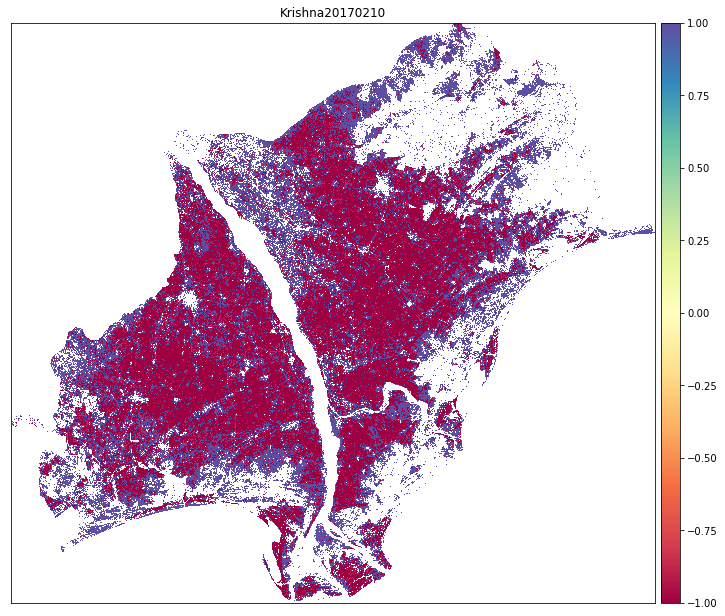

C:\Users\Hello\.conda\envs\pro\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hello\.conda\envs\pro\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


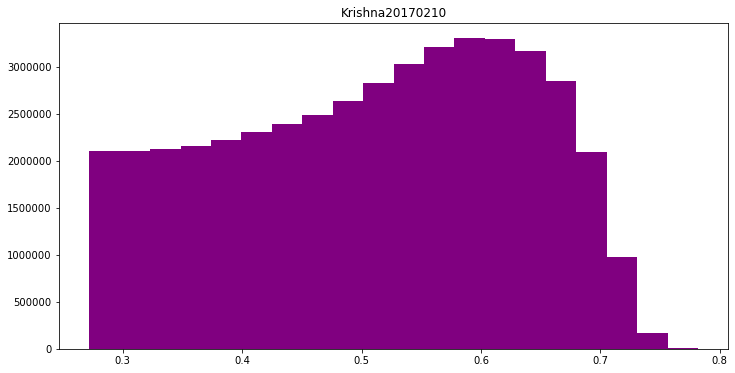

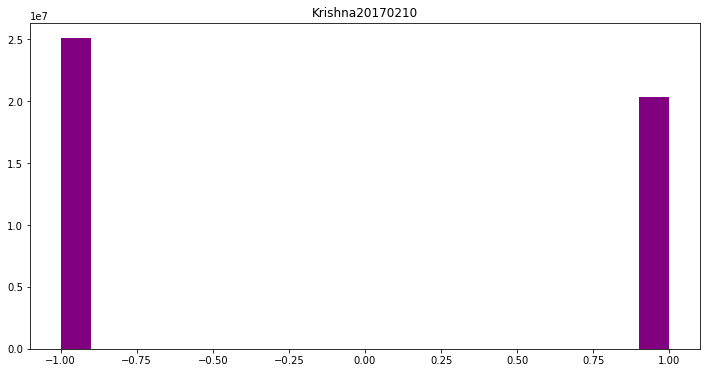

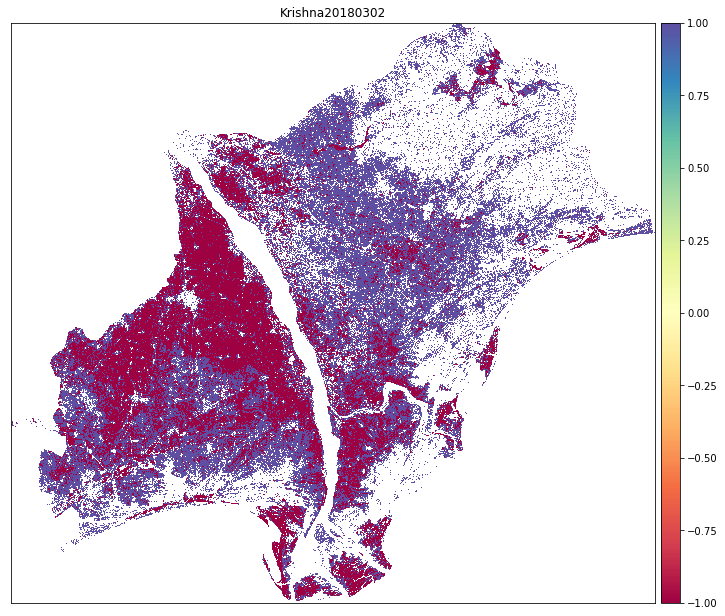

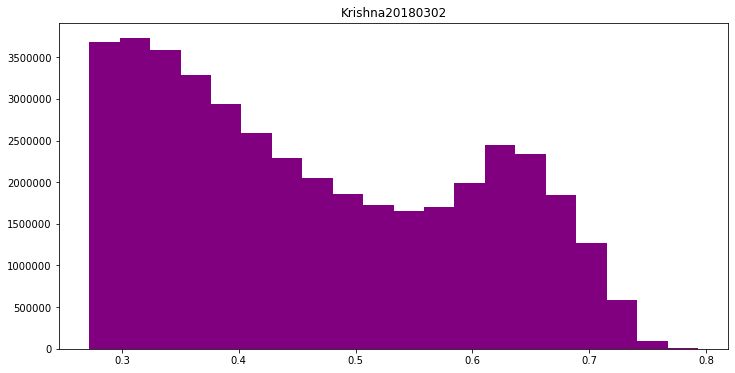

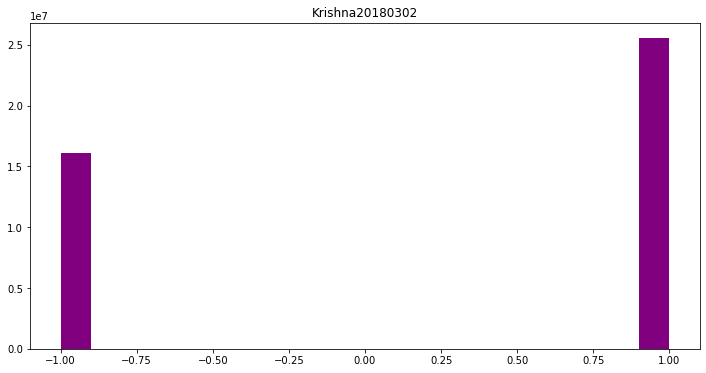

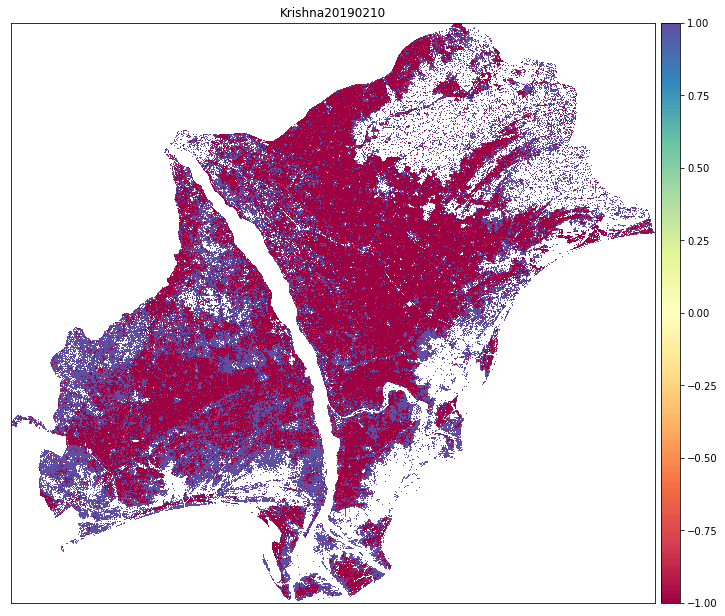

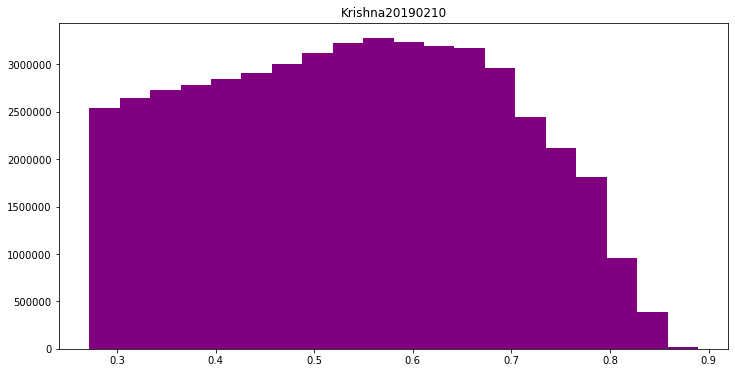

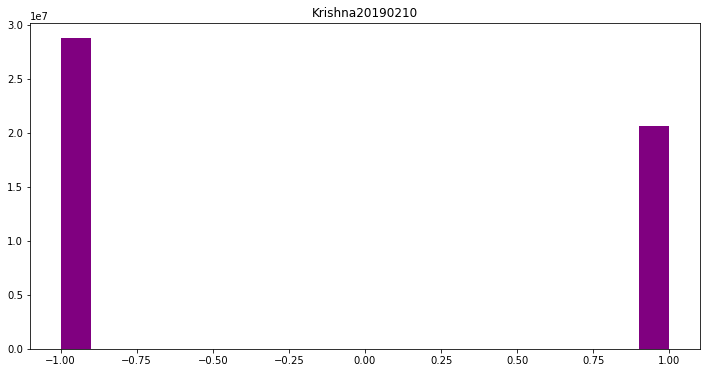

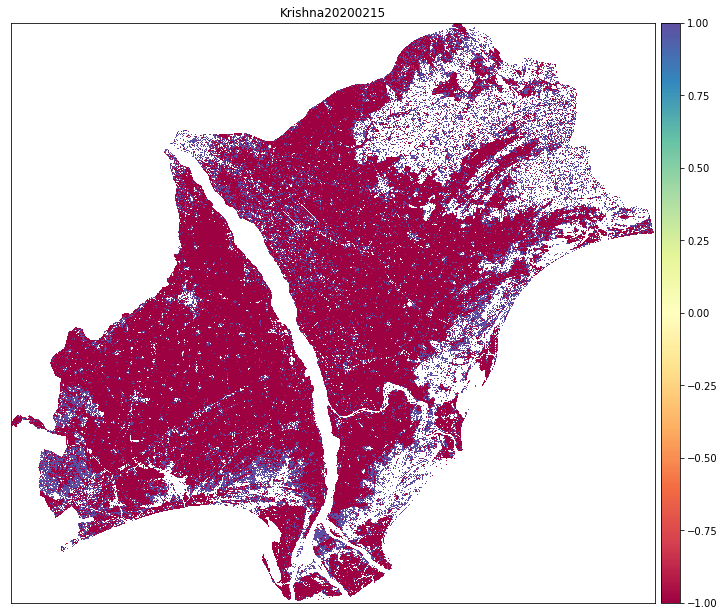

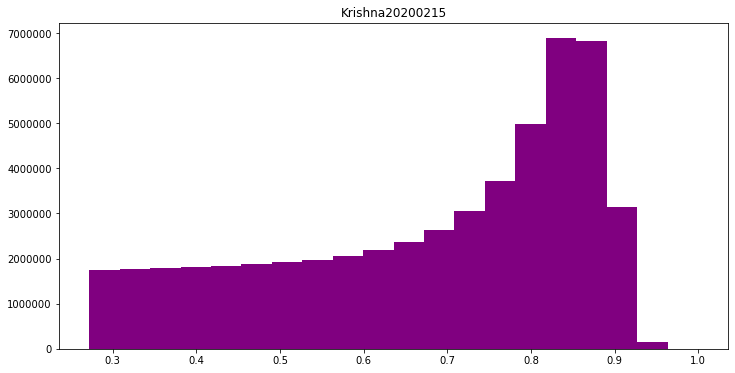

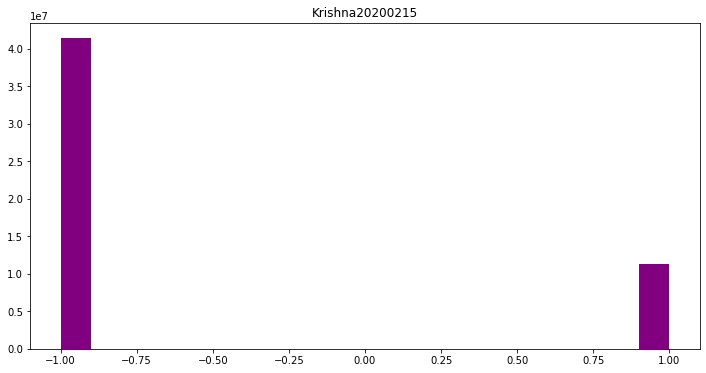

In [19]:
for item in date_bands.keys():
    filterImageBounds(item, bounds)